# Analysis from Aysel Jafarova

In [55]:
import pandas as pd

In [56]:
df =pd.read_csv("/Users/ayseljafarova/Documents/GitHub/Mortgage-Prepayment-Analysis-and-Prediction/MortgageLoanExport/LoanExport.csv")
df.head()

/var/folders/2s/pdgfv7n95b5c61z_15gwswt40000gn/T/ipykernel_91780/2951706877.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv("/Users/ayseljafarova/Documents/GitHub/Mortgage-Prepayment-Analysis-and-Prediction/MortgageLoanExport/LoanExport.csv")


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [57]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [7]:
df.isna().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.SellerName.value_counts()

SellerName
Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: count, dtype: int64

In [58]:
df['SellerName'].fillna('Unknown', inplace=True)


/var/folders/2s/pdgfv7n95b5c61z_15gwswt40000gn/T/ipykernel_91780/2114969476.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SellerName'].fillna('Unknown', inplace=True)


In [59]:
df['Sellerfrequency'] = df['SellerName'].map(df['SellerName'].value_counts(normalize=True))


In [60]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Sellerfrequency
0,0,199902,N,202901,16974,25,1,O,89,27,...,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,0.087744
1,0,199902,N,202901,19740,0,1,O,73,17,...,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,0.014085
2,0,199902,N,202901,29940,0,1,O,75,16,...,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,0.087744
3,0,199902,N,202901,31084,0,1,O,76,14,...,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,0.022529
4,0,199902,N,202901,35644,0,1,O,78,18,...,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,0.022529


In [61]:
df= df.drop("SellerName", axis=1)

In [62]:
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns].describe()


,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Sellerfrequency
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291,0.119080
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599,0.092128
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000,0.006032
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000,0.055529
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000,0.085757
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000,0.264000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000,0.264000


In [63]:
print(numerical_columns)

Index(['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units',
       'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment',
       'Sellerfrequency'],
      dtype='object')


In [64]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM',
       'ProductType', 'PropertyState', 'PropertyType', 'PostalCode',
       'LoanSeqNum', 'LoanPurpose', 'NumBorrowers', 'ServicerName'],
      dtype='object')


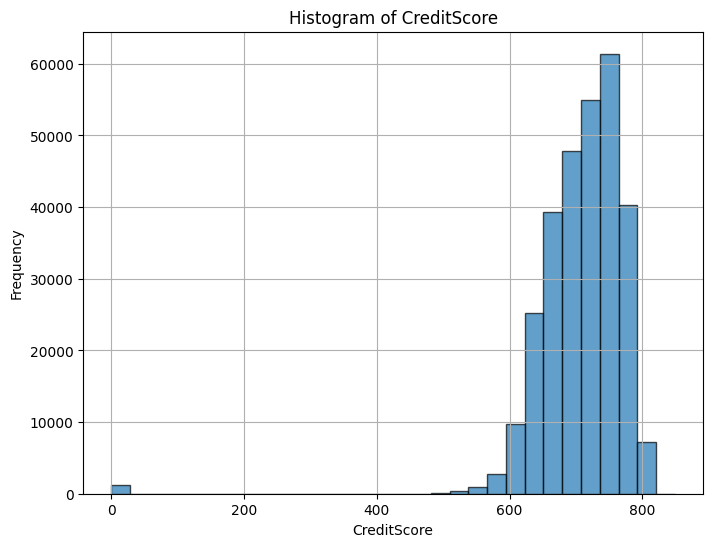

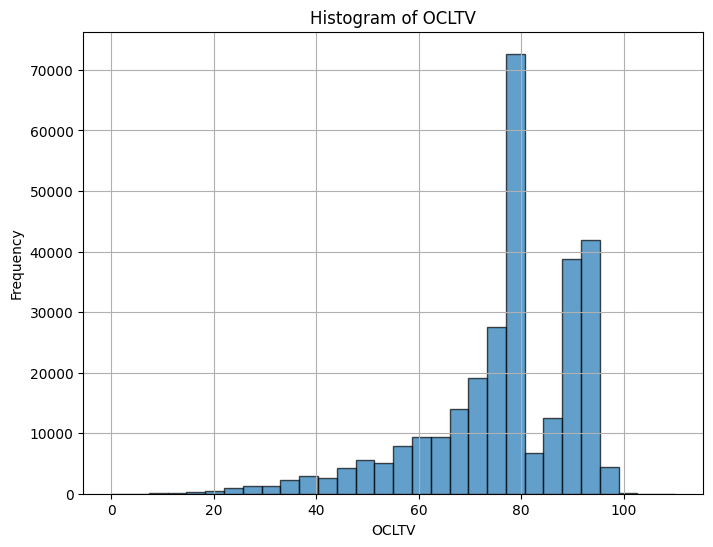

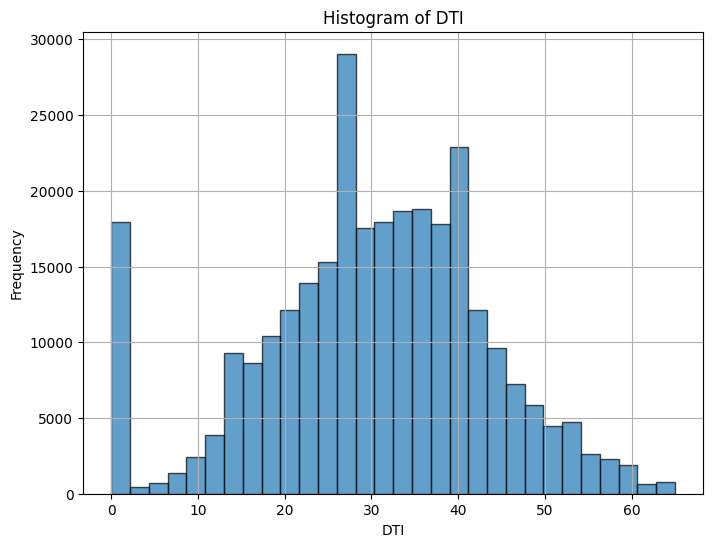

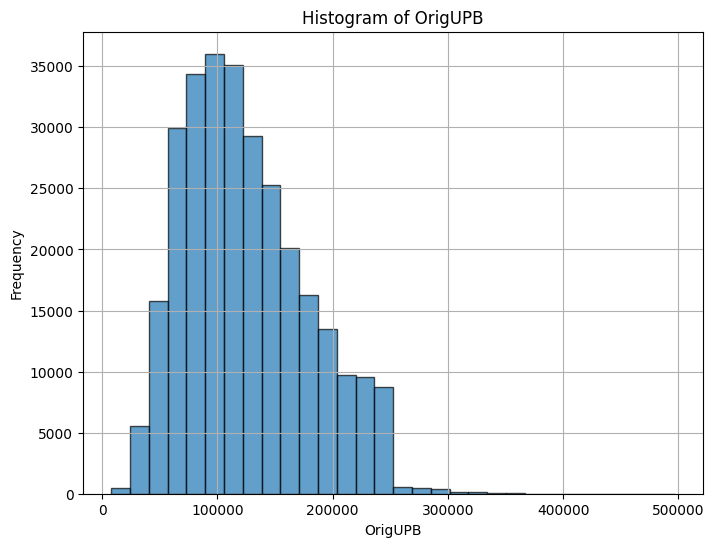

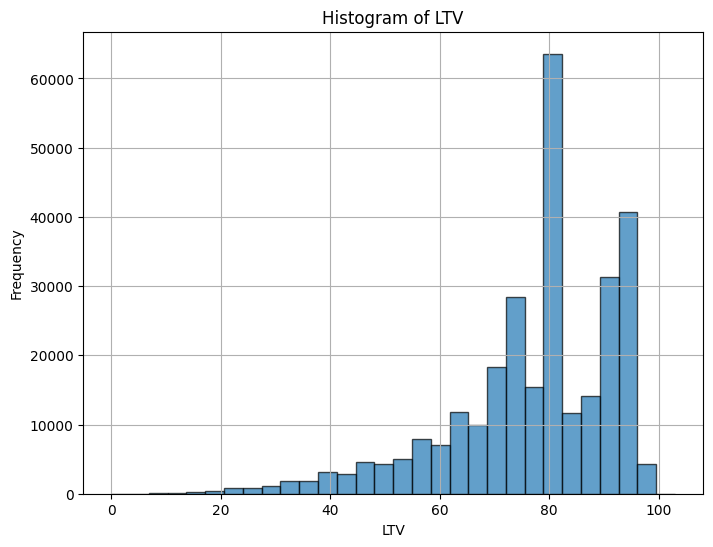

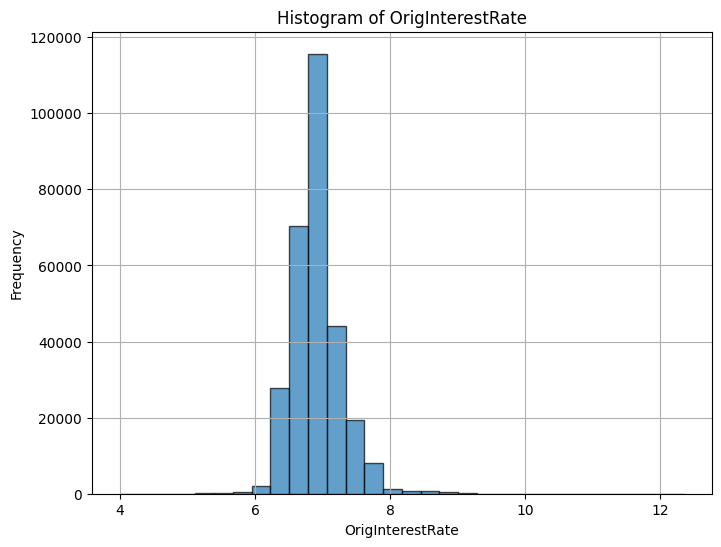

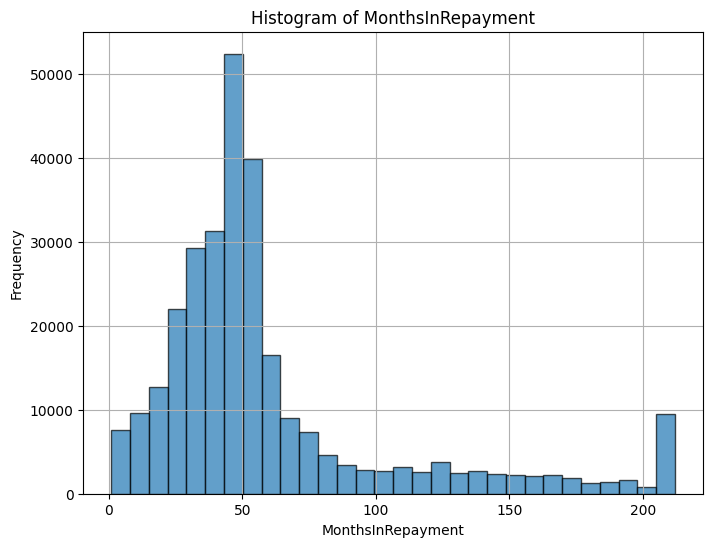

In [85]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains three numerical columns: 'num_col1', 'num_col2', 'num_col3'
numerical_columns = ['CreditScore',
       'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'MonthsInRepayment']

# Plot histograms for each numerical column
for col in numerical_columns:
	plt.figure(figsize=(8, 6))
	plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
	plt.title(f'Histogram of {col}')
	plt.xlabel(col)
	plt.ylabel('Frequency')
	plt.grid(True)
	plt.show()

In [65]:
df.EverDelinquent.value_counts(normalize=True)*100

EverDelinquent
0    80.215199
1    19.784801
Name: proportion, dtype: float64

# Our Dataset is imbalanced

In [16]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Sellerfrequency
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,WASHINGTONMUTUALBANK,0,0,52,0.087744
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,CHASEHOMEFINANCELLC,0,0,144,0.014085
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,WASHINGTONMUTUALBANK,0,0,67,0.087744
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GMACMTGECORP,0,0,35,0.022529
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GMACMTGECORP,0,0,54,0.022529


In [18]:
for col in object_columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(), "\n")


FirstTimeHomebuyer: 3 unique values
FirstTimeHomebuyer
N    184154
X     78015
Y     29282
Name: count, dtype: int64 

MSA: 392 unique values
MSA
X        39100
31084     9338
16974     8771
12060     6985
47644     6673
Name: count, dtype: int64 

Occupancy: 3 unique values
Occupancy
O    276131
I      8734
S      6586
Name: count, dtype: int64 

Channel: 4 unique values
Channel
T    167670
R    123219
C       407
B       155
Name: count, dtype: int64 

PPM: 3 unique values
PPM
N    282125
X      5405
Y      3921
Name: count, dtype: int64 

ProductType: 1 unique values
ProductType
FRM      291451
Name: count, dtype: int64 

PropertyState: 53 unique values
PropertyState
CA    43327
FL    19133
MI    16285
IL    13621
TX    13092
Name: count, dtype: int64 

PropertyType: 7 unique values
PropertyType
SF    244923
PU     27506
CO     18100
MH       723
LH       105
Name: count, dtype: int64 

PostalCode: 1767 unique values
PostalCode
94500    2582
30000    2374
48100    2166
85200    2155

### We are going to perform frequency encoding of our categorical variables, since one hot encoding will generate a lot of features 

In [66]:
for col in object_columns:
    frequency_encoding = df[col].value_counts(normalize=True)
    df[col + '_Encoded'] = df[col].map(frequency_encoding)

In [67]:
df = df.drop(object_columns, axis=1)

In [68]:
df.drop("LoanSeqNum_Encoded", axis=1, inplace=True)
df.drop("ProductType_Encoded", axis=1, inplace=True)

In [69]:
df.tail()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,...,MSA_Encoded,Occupancy_Encoded,Channel_Encoded,PPM_Encoded,PropertyState_Encoded,PropertyType_Encoded,PostalCode_Encoded,LoanPurpose_Encoded,NumBorrowers_Encoded,ServicerName_Encoded
291446,839,199903,202902,0,1,60,32,90000,60,7.000,...,0.008965,0.947435,0.422778,0.968001,0.02655,0.840357,0.001235,0.377545,0.642767,0.219738
291447,840,200210,202904,0,1,73,0,267000,73,6.375,...,0.014253,0.947435,0.001396,0.968001,0.02715,0.840357,0.000055,0.423413,0.642767,0.219738
291448,840,200304,202904,0,1,73,31,87000,73,5.625,...,0.017327,0.947435,0.422778,0.968001,0.14866,0.840357,0.003977,0.377545,0.356070,0.219738
291449,845,199904,202903,0,1,80,54,88000,80,7.000,...,0.008965,0.029967,0.422778,0.968001,0.02655,0.840357,0.001012,0.423413,0.642767,0.219738
291450,849,199903,202902,0,1,47,29,70000,47,7.000,...,0.008965,0.947435,0.422778,0.968001,0.02655,0.840357,0.001012,0.423413,0.642767,0.219738


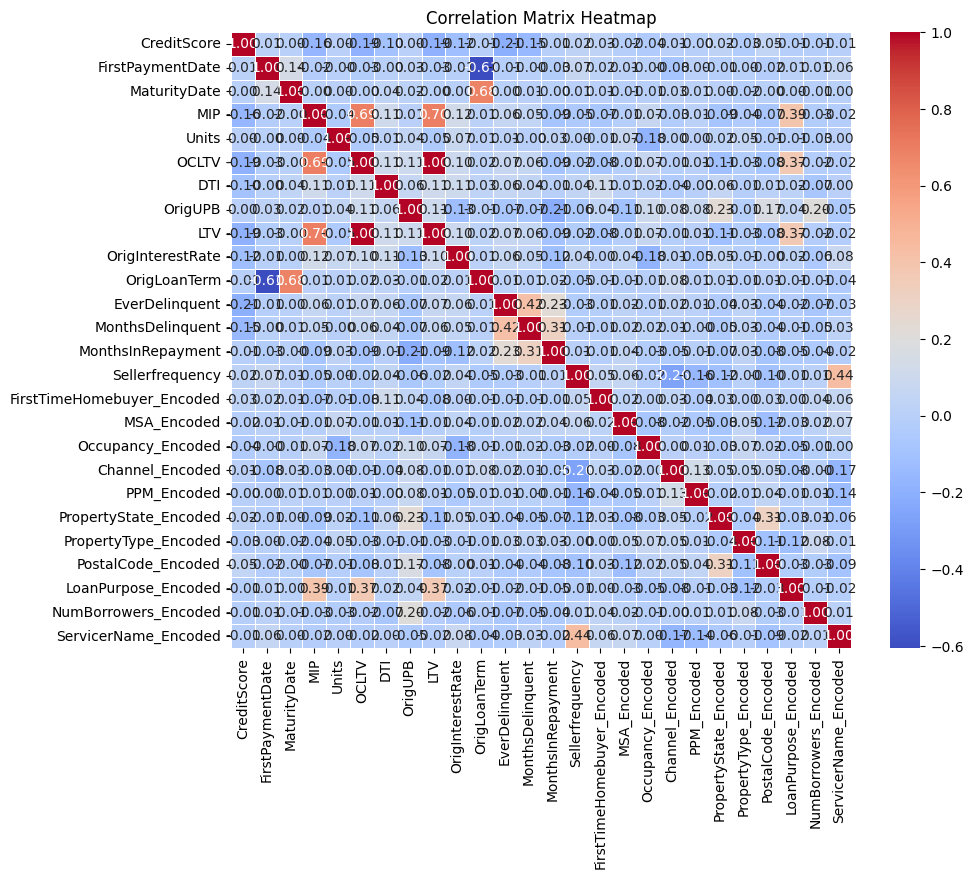

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [71]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

target_column = 'EverDelinquent'


features = df.drop(columns=[target_column])
target = df[target_column]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)


df_scaled = pd.concat([features_scaled, target.reset_index(drop=True)], axis=1)

df_scaled.head()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,...,Occupancy_Encoded,Channel_Encoded,PPM_Encoded,PropertyState_Encoded,PropertyType_Encoded,PostalCode_Encoded,LoanPurpose_Encoded,NumBorrowers_Encoded,ServicerName_Encoded,EverDelinquent
0,-10.363262,-0.199733,-0.08496,1.247865,-0.128194,0.790192,-0.229738,-0.147983,0.792236,-0.513905,...,0.235542,0.835106,0.181813,-0.039233,0.435691,1.002632,0.742165,0.742658,-0.216939,0
1,-10.363262,-0.199733,-0.08496,-0.728692,-0.128194,-0.259943,-0.987087,-0.297077,-0.258648,-1.241622,...,0.235542,-1.106836,0.181813,-0.307563,0.435691,1.221440,0.192906,-1.327912,-1.029747,0
2,-10.363262,-0.199733,-0.08496,-0.728692,-0.128194,-0.128676,-1.062822,-0.688450,-0.127287,-0.150047,...,0.235542,0.835106,0.181813,-0.907045,0.435691,-0.527172,0.192906,0.742658,-0.216939,0
3,-10.363262,-0.199733,-0.08496,-0.728692,-0.128194,-0.063043,-1.214292,0.653398,-0.061607,-0.150047,...,0.235542,-1.106836,0.181813,2.242115,0.435691,-0.161873,0.192906,0.742658,-0.739058,0
4,-10.363262,-0.199733,-0.08496,-0.728692,-0.128194,0.068224,-0.911352,-0.297077,0.069753,0.577670,...,0.235542,-1.106836,0.181813,-0.512613,0.435691,-0.538298,0.192906,0.742658,-0.739058,0


In [72]:
df_scaled.columns

Index(['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units',
       'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm',
       'MonthsDelinquent', 'MonthsInRepayment', 'Sellerfrequency',
       'FirstTimeHomebuyer_Encoded', 'MSA_Encoded', 'Occupancy_Encoded',
       'Channel_Encoded', 'PPM_Encoded', 'PropertyState_Encoded',
       'PropertyType_Encoded', 'PostalCode_Encoded', 'LoanPurpose_Encoded',
       'NumBorrowers_Encoded', 'ServicerName_Encoded', 'EverDelinquent'],
      dtype='object')

In [116]:
import pandas as pd


correlation_matrix = df_scaled.corr()

threshold = 0.8


highly_correlated_pairs = [(i, j, correlation_matrix.loc[i, j]) 
						   for i in correlation_matrix.columns 
						   for j in correlation_matrix.columns 
						   if i != j and abs(correlation_matrix.loc[i, j]) > threshold]


highly_correlated_df = pd.DataFrame(highly_correlated_pairs, columns=['Feature1', 'Feature2', 'Correlation'])

print(highly_correlated_df)

  Feature1 Feature2  Correlation
0    OCLTV      LTV      0.99947
1      LTV    OCLTV      0.99947


In [120]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

# Get the coefficients of the features
model_coefficients = pd.DataFrame(model.coef_.reshape(-1), index=X_train.columns, columns=['Coefficient'])
selected_features = model_coefficients[model_coefficients['Coefficient'] != 0].index
X_selected = X_train[selected_features]
X_selected.head()

/Users/ayseljafarova/anaconda3/envs/newenv/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,MonthsDelinquent,MonthsInRepayment,Sellerfrequency
227156,0.702586,-0.728692,-0.128194,0.133858,1.057755,0.355210,-0.877764,0.071985,-0.208611,0.047564,1.573021
258743,0.921857,-0.728692,-0.128194,0.199491,0.148936,0.951587,-1.605481,0.071985,-0.208611,-0.299188,1.573021
95760,-0.276821,-0.728692,-0.128194,-1.375712,1.133490,0.467030,1.305388,0.071985,-0.208611,-1.122724,-0.008454
107774,-0.189113,1.247865,-0.128194,0.724559,0.073201,-0.781634,0.941529,0.071985,-0.208611,-0.472564,1.573021
104168,-0.203731,-0.728692,-0.128194,0.199491,-0.381208,0.355210,-0.513905,0.071985,-0.208611,-0.320860,1.573021


In [ ]:
data = df_scaled[['CreditScore','MIP', 'Units','OCLTV', 'DTI', 'OrigUPB','OrigInterestRate','OrigLoanTerm',
                  'MonthsDelinquent', 'MonthsInRepayment','Sellerfrequency']]
target = df_scaled["EverDelinquent"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [201]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.metrics import classification_report_imbalanced


In [114]:
Clf = LogisticRegression(random_state=42)
Clf.fit(X_train, y_train)
y_pred = Clf.predict(X_test)
accuracy_score(y_test, y_pred)



1.0

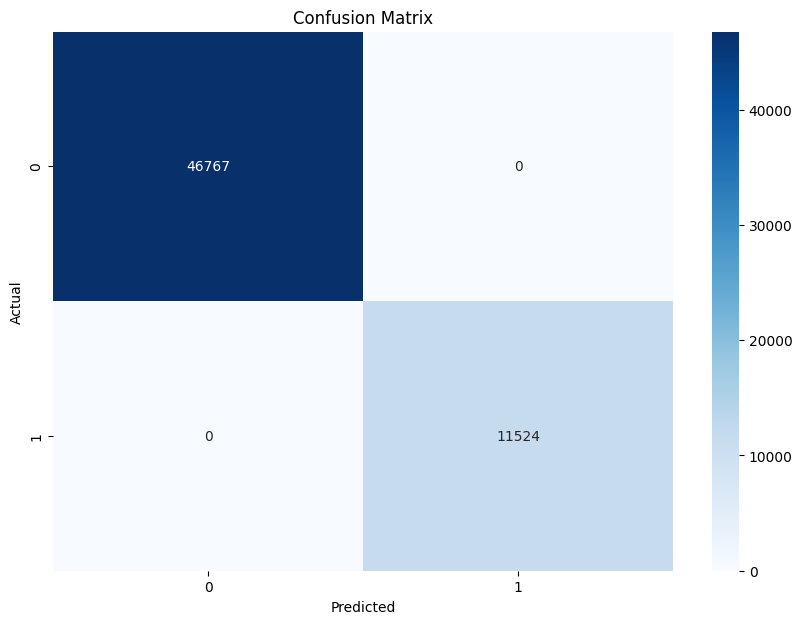

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [118]:
from imblearn.metrics import classification_report_imbalanced

report = classification_report_imbalanced(y_test, y_pred)
print(report)

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00     46767
          1       1.00      1.00      1.00      1.00      1.00      1.00     11524

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     58291



# There is no sign of overfitting

In [119]:
train_accuracy = Clf.score(X_train, y_train)
test_accuracy = Clf.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 1.00


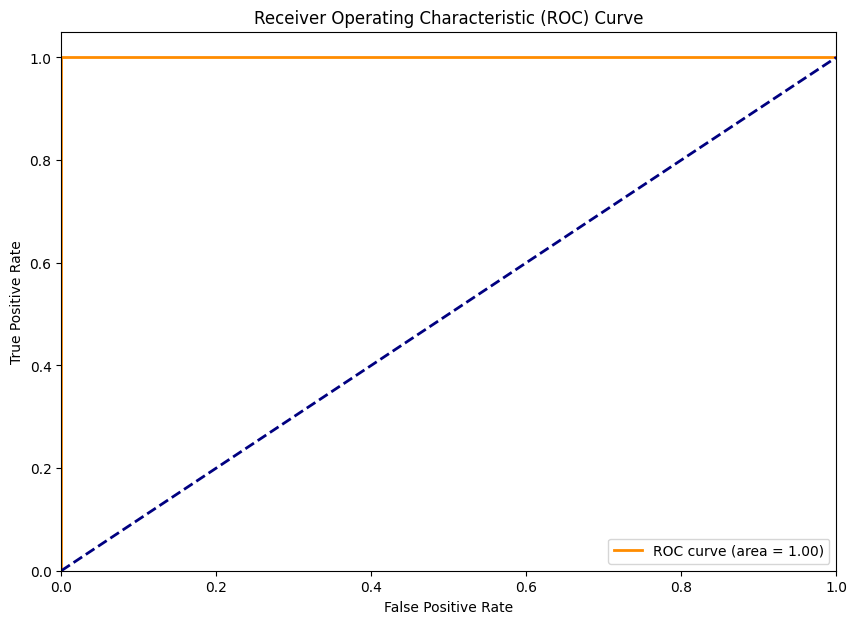

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba = Clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
from sklearn.svm import SVC
cfl2 = SVC(kernel='linear',random_state=42)
cfl2.fit(X_train, y_train)
y_pred2 = cfl2.predict(X_test)
accuracy_score(y_test, y_pred2)



1.0

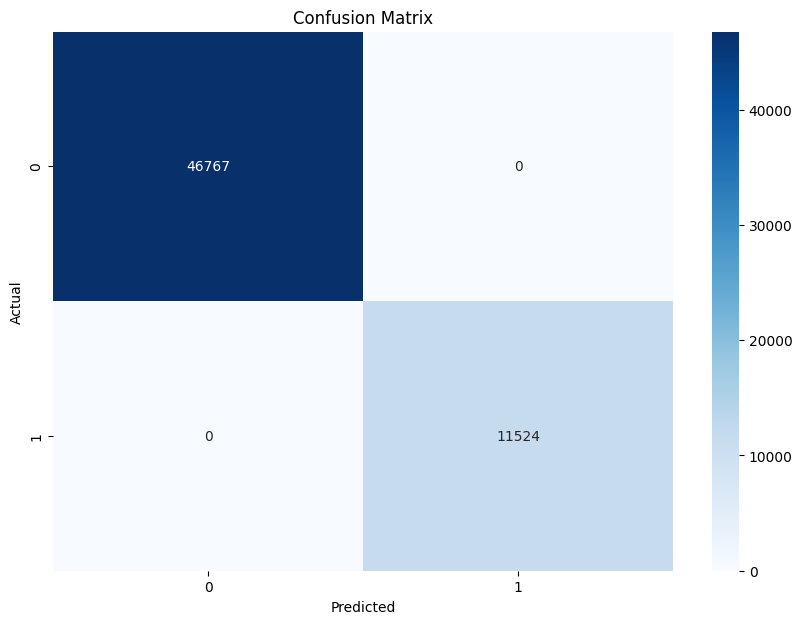

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from imblearn.metrics import classification_report_imbalanced

# Assuming y_test and y_pred are your true labels and predicted labels respectively
report2 = classification_report_imbalanced(y_test, y_pred2)
print(report2)

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00     46767
          1       1.00      1.00      1.00      1.00      1.00      1.00     11524

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     58291



In [31]:
# Assuming Clf is your trained model
train_accuracy = cfl2.score(X_train, y_train)
test_accuracy = cfl2.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 1.00


In [25]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.1/236.1 MB 2.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 35.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 33.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 32.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.3/282.3 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorbo

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
	Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
	Dense(32, activation='relu'),
	Dense(1, activation='sigmoid') 
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/50


/Users/ayseljafarova/anaconda3/envs/newenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5829/5829 ━━━━━━━━━━━━━━━━━━━━ 2s 339us/step - accuracy: 0.9423 - loss: 0.1521 - val_accuracy: 0.9996 - val_loss: 0.0022
Epoch 2/50
5829/5829 ━━━━━━━━━━━━━━━━━━━━ 2s 334us/step - accuracy: 0.9993 - loss: 0.0028 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 3/50
5829/5829 ━━━━━━━━━━━━━━━━━━━━ 2s 313us/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.9949 - val_loss: 0.0149
Epoch 4/50
5829/5829 ━━━━━━━━━━━━━━━━━━━━ 3s 431us/step - accuracy: 0.9995 - loss: 0.0017 - val_accuracy: 0.9999 - val_loss: 7.3924e-04
Epoch 5/50
5829/5829 ━━━━━━━━━━━━━━━━━━━━ 2s 318us/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.9995 - val_loss: 9.3660e-04
Epoch 6/50
5829/5829 ━━━━━━━━━━━━━━━━━━━━ 2s 311us/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9997 - val_loss: 5.0710e-04
Epoch 7/50
5829/5829 ━━━━━━━━━━━━━━━━━━━━ 2s 322us/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9997 - val_loss: 8.0170e-04
Epoch 8/50
5829/5829 ━━━━━━━━━━━━━━━━━━━━ 2s 312us/step - accuracy: 0.9

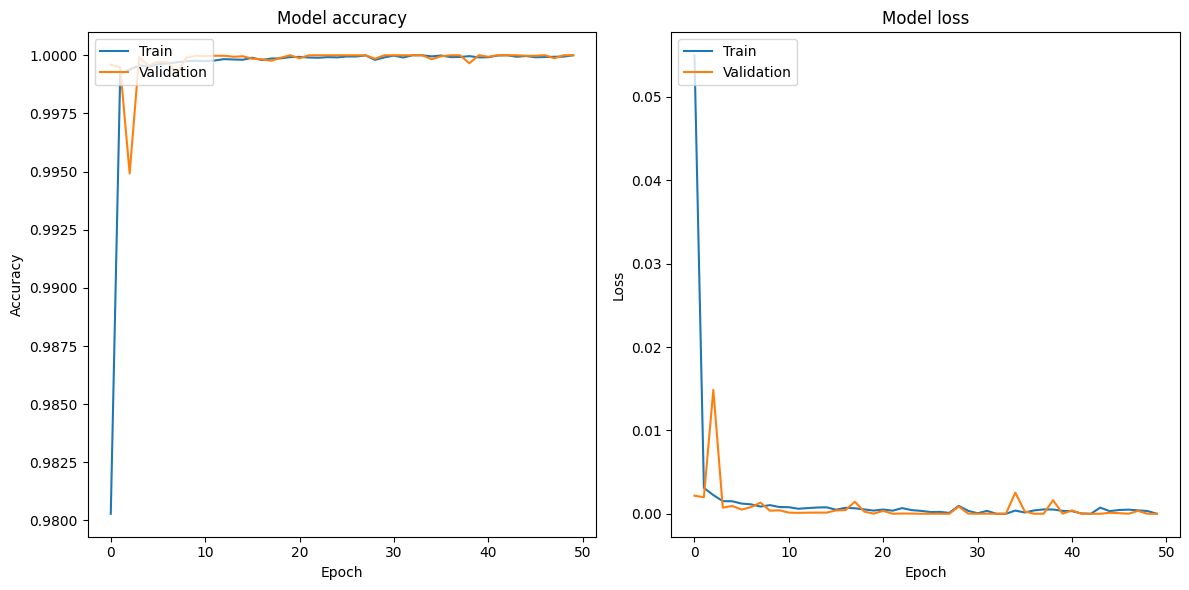

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()